# MScFE 690 Capstone

---

## Data Engineering

In [ ]:
pip install git+https://github.com/algoplexity/Machine-Learning-for-Algorithmic-Trading-Second-Edition.git

  Cloning https://github.com/algoplexity/Machine-Learning-for-Algorithmic-Trading-Second-Edition.git to /tmp/pip-req-build-1_0m4074
  Running command git clone --filter=blob:none --quiet https://github.com/algoplexity/Machine-Learning-for-Algorithmic-Trading-Second-Edition.git /tmp/pip-req-build-1_0m4074
  Resolved https://github.com/algoplexity/Machine-Learning-for-Algorithmic-Trading-Second-Edition.git to commit b662d5f933b48f2f02af62a23365e835e6334436
ERROR: git+https://github.com/algoplexity/Machine-Learning-for-Algorithmic-Trading-Second-Edition.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


### Connect to Google Drive for price data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Capstone/data

/content/drive/MyDrive/Colab Notebooks/Capstone/data


### Imports and Settings

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

### Set Data Store path

In [ ]:
DATA_STORE = Path('stocks.h5')

wiki_prices.csv is available at https://osf.io/659ed/files/osfstorage

In [ ]:
df = (pd.read_csv('wiki_prices.csv',
                 parse_dates=['date'],
                 index_col=['date', 'ticker'],
                 infer_datetime_format=True)
     .sort_index())

print(df.info(null_counts=True))
with pd.HDFStore(DATA_STORE) as store:
    store.put('quandl/wiki/prices', df)

In [ ]:
#tickers = ['BA', 'CAT', 'DIS', 'GE', 'IBM']
tickers = ['BA', 'IBM']
df1 = df.adj_close.unstack('ticker').loc['2018':'2020', tickers]
df1

ticker,BA,IBM
date,,
2018-01-02,296.84,154.25
2018-01-03,297.80,158.49
2018-01-04,296.67,161.70
2018-01-05,308.84,162.49
2018-01-08,310.15,163.47
2018-01-09,318.43,163.83
2018-01-10,320.26,164.18
2018-01-11,328.12,164.20
2018-01-12,336.21,163.14


In [ ]:
max_prices = df1.max()
print(max_prices)

ticker
BA     364.64
IBM    169.12
dtype: float64


In [ ]:
import math

max_price = 364.64 * 100
bits_required = math.ceil(math.log2(max_price + 1))

print(f"Number of bits required for each price data: {bits_required}")

Number of bits required for each price data: 16


### Obtain last price data as binary-coded strings

In [ ]:
# Convert prices to 16-bit binary codes and combine them
binary_strings = []

for _, row in df1.iterrows():
    binary_string = ""
    for price in row:
        print(f"price: {price}")

        # Check for missing values
        if pd.notnull(price):
            # Convert price to a fixed length 16-bit binary code
            binary_code = format(int(round(price, 2) * 100), '016b')
            # Pad the binary code with leading zeros if necessary
            print(f"binary price data: {binary_code}")
            if len(binary_code) < 16:
                binary_code = binary_code.zfill(16)
            # Add the fixed length 16-bit binary code to the row's binary string
            binary_string += binary_code

    # Add the row's binary string to the list
    binary_strings.append(binary_string)

# Create a new DataFrame with the binary strings
df_binary = pd.DataFrame(binary_strings, columns=['Binary String'])

print(df_binary)


price: 296.84
binary price data: 0111001111110011
price: 154.25
binary price data: 0011110001000001
price: 297.8
binary price data: 0111010001010100
price: 158.49
binary price data: 0011110111101001
price: 296.67
binary price data: 0111001111100011
price: 161.7
binary price data: 0011111100101001
price: 308.84
binary price data: 0111100010100011
price: 162.49
binary price data: 0011111101111001
price: 310.15
binary price data: 0111100100100110
price: 163.47
binary price data: 0011111111011011
price: 318.43
binary price data: 0111110001100011
price: 163.83
binary price data: 0011111111111111
price: 320.26
binary price data: 0111110100011010
price: 164.18
binary price data: 0100000000100010
price: 328.12
binary price data: 1000000000101100
price: 164.2
binary price data: 0100000000100100
price: 336.21
binary price data: 1000001101010101
price: 163.14
binary price data: 0011111110111001
price: 335.16
binary price data: 1000001011101100
price: 163.85
binary price data: 0100000000000001
pri

In [ ]:
binary_code = df_binary.loc[1, 'Binary String']
print(binary_code)

01110100010101000011110111101001


In [ ]:
len(binary_code)

32

In [ ]:
def price_to_binary(price):
    # Round the price to 2 decimal places
    rounded_price = round(price, 2)
    print(f"rounded price: {rounded_price}")

    # Multiply the rounded price by 100 and convert it to an integer
    scaled_price = int(rounded_price * 100)
    print(f"scaled price: {scaled_price}")

    # Convert the scaled price to a fixed length 9-bit binary code
    binary_code = format(scaled_price, '016b')
    print(f"binary code: {binary_code}")

    return binary_code

In [ ]:
price = 27.189
binary_code = price_to_binary(price)
print(binary_code)  # Output: '001100011'

rounded price: 27.19
scaled price: 2719
binary code: 0000101010011111
0000101010011111


In [ ]:
len(binary_code)

16

---

### Measure Information Content using BDM

---

In [ ]:
!pip install git+https://github.com/lantunes/cellpylib.git

  Cloning https://github.com/lantunes/cellpylib.git to /tmp/pip-req-build-dpq8jtvx
  Running command git clone --filter=blob:none --quiet https://github.com/lantunes/cellpylib.git /tmp/pip-req-build-dpq8jtvx
  Resolved https://github.com/lantunes/cellpylib.git to commit 743e936d48f8520f6f4ac652570ac7bb46414189
  Preparing metadata (setup.py) ... done
  Created wheel for cellpylib: filename=cellpylib-2.4.0-py3-none-any.whl size=37928 sha256=0f903ea7690923e104072bf57b64be6efeb80cb5881a857567b01a9df8ad41e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-mzdkgvb9/wheels/33/9c/95/2f801091f0c1a3e71e37af261dd977e384a20710ac04c7cf5f
Successfully built cellpylib


In [ ]:
for i in range(200):
    gray_code = i ^ (i >> 1)  # Calculate Gray code
    binary_str = format(gray_code, 'b').zfill(8)  # Convert to binary string
    gray_int = int(binary_str, 2)  # Convert binary string to integer
    print(f"Gray code: {gray_int}, Binary: {binary_str}")

In [ ]:
X = np.ones((100,), dtype=int)
X

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
CAs_list = []
for i in range(200):
    gray_code = i ^ (i >> 1)  # Calculate Gray code
    binary_str = format(gray_code, 'b').zfill(8)  # Convert to binary string
    int_list = [int(bit) for bit in binary_str]
    cellular_automaton = np.array([int_list], dtype=int)
    cellular_automaton = cpl.evolve(cellular_automaton, timesteps=100,
                                apply_rule=cpl.NKSRule(22))
    CAs_list.append(cellular_automaton)

In [ ]:
my_titles = ["Rule 22"] * 200
cpl.plot_multiple(ca_list=CAs_list, titles=my_titles)

In [ ]:
gray_codes = []
for i in range(200):
    gray_codes.append(i ^ (i >> 1))
padded_strs = []
for code in gray_codes:
    binary_str = bin(code)[2:]
    padded_str = '0'*100 + binary_str + '0'*100
    padded_strs.append(padded_str)
    #print(padded_str)

In [ ]:
pip install graycode

  Preparing metadata (setup.py) ... done
  Created wheel for graycode: filename=graycode-1.0.5-py3-none-any.whl size=3974 sha256=ef9d22c56c07f5e90d9a5c66992745e0c83066800f318c41a1d78fd8c9dba4af
  Stored in directory: /root/.cache/pip/wheels/15/f0/91/019e588ee2c9c3fc0fb391bd906891bd4b51050b2a7d10d1e0
Successfully built graycode


In [ ]:
from graycode import gray_code

# Generate the first 200 gray codes
for i in range(200):
    print(i, '{:08b}'.format(graycode.tc_to_gray_code(i)))


# Loop through each gray code and add the 100 zeros on the left and right side
for code in gray_codes:
    binary_string = "{:0100b}".format(int(code, 2))
    # Do something with the binary string here
    print(binary_string)

In [ ]:
# An example of a 1D binary CA with 10 cells evolved for 3 timesteps
# cellular_automaton = [
#     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # 1st timestep (initial conditions)
#     [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],  # 2st timestep
#     [0, 0, 0, 1, 0, 1, 0, 1, 0, 0]   # 3rd timestep
# ]

my_list = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

cellular_automaton = np.array([gray_codes[99]], dtype=int)
cellular_automaton = cpl.evolve(cellular_automaton, timesteps=500,
                                    apply_rule=cpl.NKSRule(22))

cellular_automaton

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [ ]:
import cellpylib as cpl
for i in range(200):

    cellular_automaton = np.array([gray_codes[i]], dtype=int)

    cellular_automaton = cpl.evolve(cellular_automaton, timesteps=500,
                                    apply_rule=cpl.NKSRule(22))
print(f"cellular_automaton[0,:] {cellular_automaton[0,:]}")
print(f"cellular_automaton[99,:] {cellular_automaton[99,:]}")

cellular_automaton[0,:] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
cellular_automaton[99,:] [0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0]


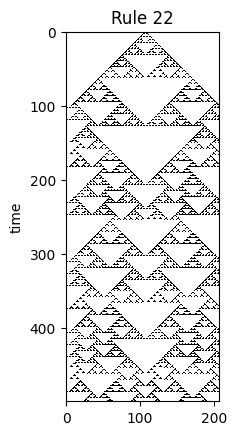

In [ ]:
cpl.plot(cellular_automaton, title='Rule 22')

In [ ]:
pip install git+https://github.com/sztal/pybdm.git

  Cloning https://github.com/sztal/pybdm.git to /tmp/pip-req-build-6z_1psb0
  Running command git clone --filter=blob:none --quiet https://github.com/sztal/pybdm.git /tmp/pip-req-build-6z_1psb0
  Resolved https://github.com/sztal/pybdm.git to commit 4bedea1200998a8978ada1a708b4e1f98aacb2d8
  Preparing metadata (setup.py) ... done
  Created wheel for pybdm: filename=pybdm-0.1.0-py2.py3-none-any.whl size=39933846 sha256=dd15a98a65f8ee7de6c6e6fbd03d21b9bf42b876c428dee416b913d2386118c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-hf0cpbne/wheels/67/6e/1c/64fedb780569cd521fe6933032437f99c23618d9d40ad769fd
Successfully built pybdm


In [ ]:
from graycode import tc_to_gray_code

gray_codes = []

# Now generate a list of 200 binary strings, each with 100 zeros on the left and right side
for i in range(200):
    gray_code = tc_to_gray_code(i)
    binary_string = "0" * 100 + "{:08b}".format(gray_code) + "0" * 100
    binary_list = [int(bit) for bit in binary_string]
    gray_codes.append(binary_list)



In [ ]:
print(gray_codes[10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
import cellpylib as cpl
from pybdm import BDM

# Initialize BDM object
# ndim argument specifies dimensionality of BDM
bdm = BDM(ndim=2)

k_list = []
for i in range(200):

    cellular_automaton = np.array([gray_codes[i]], dtype=int)

    cellular_automaton = cpl.evolve(cellular_automaton, timesteps=500,
                                    apply_rule=cpl.NKSRule(22))
    # Compute BDM
    k = bdm.bdm(cellular_automaton)
    # initial configuration is made up of 8 bits fixed length gray code
    # padded by 100 bits of zeros on the left and right, total 208 bits in length
    # Therefore, |s(i,t)| = 208 x 500
    k_normalised = k/((100 + 8 + 100) * 500)
    k_list.append(k_normalised)

In [ ]:
import graycode
gc_list = []
gc_list = graycode.gen_gray_codes(8)


In [ ]:
gc_list[10]

15

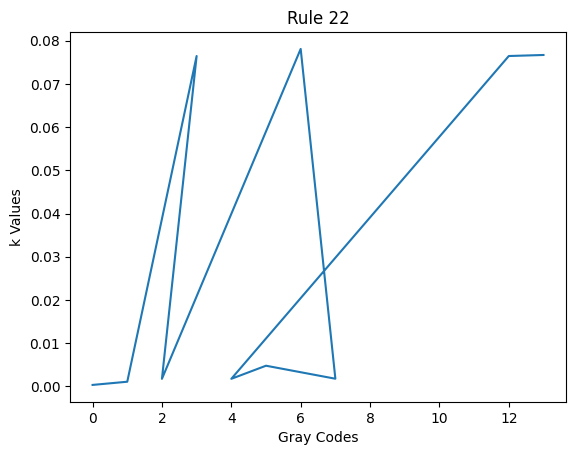

In [ ]:
import matplotlib.pyplot as plt
# Plot the gray codes on the x-axis and k values on the y-axis
plt.plot(gc_list[0:10], k_list[0:10])
#plt.plot(gray_codes[0:10], k_list[0:10])
plt.xlabel('Gray Codes')
plt.ylabel('k Values')
plt.title('Rule 22')
plt.show()

In [ ]:
gc_list[1]

1

In [ ]:
gray_codes[10]

In [ ]:
k_list[1]

0.0010723035727695073

In [ ]:
import cellpylib as cpl

cellular_automaton = cpl.init_simple(200)

cellular_automaton = cpl.evolve(cellular_automaton, timesteps=100, memoize=True,
                                apply_rule=lambda n, c, t: cpl.nks_rule(n, 30))
cpl.plot(cellular_automaton, title='Rule 30')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-558f3fb1d7c1>", line 1, in <cell line: 1>
    import cellpylib as cpl
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtrace

---

## Translated R codes

In [ ]:
import pandas as pd
import numpy as np
import math

def bdm1D(x, block_size, offset, base):
    splitted_string = split_string(x, block_size, offset)
    normalized_string = [normalize_string(s) for s in splitted_string]
    bdm = get_bdm(normalized_string, base)
    return bdm

# def normalize_string(x):
#     elements = np.unique(list(x))
#     if any([len(el) > 10 for el in elements]):
#         raise ValueError("Too many symbols (more than 10)")
#     exchanged = ["".join(str(list(a).index(b)) for b in list(x)) for a in elements]
#     return "".join(exchanged)

def normalize_string(x):
    elements = np.unique(list(x))
    if any([len(el) > 10 for el in elements]):
        raise ValueError("Too many symbols (more than 10)")
    exchanged = [str(list(elements).index(b)) for b in list(x)]
    return "".join(exchanged)

def get_bdm(strings_vector, base):
    maxKnownKs = pd.read_csv("data/maxKnownKs.csv")
    string_counts = pd.DataFrame(strings_vector, columns=["strings_vector"])
    string_counts["ks"] = [acss(s, base)[0][0] for s in string_counts["strings_vector"]]
    na_indices = string_counts["ks"].isna()
    na_strings = string_counts[na_indices]["strings_vector"].tolist()
    na_lengths = [len(s) for s in na_strings]
    naKs = maxKnownKs["K." + str(base)].tolist() + 1
    string_counts.loc[na_indices, "ks"] = naKs
    bdm = np.sum(np.log2(string_counts["Freq"])) + np.sum(string_counts["ks"])
    return bdm

def split_string(x, block_size, offset):
    if block_size > len(x):
        return [x]
    if offset > block_size:
        raise ValueError("Offset cannot be greater than block size.")
    subs = []
    start_indices = range(0, len(x), offset)
    for i in start_indices:
        first = i
        last = min(i + block_size, len(x))
        subs.append(x[first:last])
    return subs

def get_bits_in_string(x):
    x = x.encode("utf-8")
    bit_list = [format(byte, "08b") for byte in x]
    bits_in_string = "".join(bit_list)
    return bits_in_string

def number_to_binary(x, no_bits=None):
    binary_vector = list(format(x, "08b")[::-1])
    if no_bits is None:
        return binary_vector
    else:
        return binary_vector[-no_bits:]

def count_symbols(x):
    return len(set(list(x)))


In [ ]:
# Test data
bin_string = "1001010101000010101001"

# Test bdm1D function
block_size = 12
offset = 11
base = 2
result = bdm1D(bin_string, block_size, offset, base)
print("Kolmogorov-Chaitin complexity:", result)

# Test normalize_string function
normalized_string = normalize_string(bin_string)
print("Normalized string:", normalized_string)

# Test split_string function
block_size = 5
offset = 3
splitted_string = split_string(bin_string, block_size, offset)
print("Splitted strings:", splitted_string)

# Test get_bits_in_string function
bits_in_string = get_bits_in_string(bin_string)
print("Bits in string:", bits_in_string)

# Test number_to_binary function
number = 10
binary = number_to_binary(number, no_bits=4)
print("Binary representation:", binary)

# Test count_symbols function
symbol_count = count_symbols(bin_string)
print("Number of symbols:", symbol_count)


FileNotFoundError: ignored

---

In [ ]:
import numpy as np

# Define the precision level for discretization
precision = 4

# Define the original return series
returns = np.array([0.01, -0.02, 0.03, 0.01, 0.01, -0.02, -0.02, -0.02, -0.02, -0.02])

# Discretize the return series by rounding each return to 'precision' decimal places
discretized_returns = np.round(returns, precision)

# Convert each discretized return to a letter according to its sign (positive or negative)
discretized_sequence = ['A' if r >= 0 else 'B' for r in discretized_returns]

print(discretized_sequence)

['A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


In [ ]:
# Example input prices
prices = [10.1234, 10.2345, 10.3456]

# Define precision level (number of decimal places)
precision = 4

# Define mapping from rounded price values to binary strings
discrete_map = {
    round(price, precision): format(int(round(price, precision) * (10 ** precision)), 'b')
    for price in prices
}

# Discretize prices by mapping each rounded value to its corresponding binary string
discretized_prices = [discrete_map[round(price, precision)] for price in prices]

# Print discretized prices
print(discretized_prices)

['11000101101110010', '11000111111001001', '11001010000011111']


# Archived for reference

## Step 5


Interpreting the results. As a group, the team:

a. reports the accuracy of forecasting the price of crude oil, and

b. develops a graphical way to display the results.

a.

As shown in the mean errors between the WTI Crude Oil prices in both validation and test datasets and their corresponding predicted prices using the same Belief Network or Model trained using the training datasets are about 43% and 62% respectively, ie about 43% and 62% of the prices in the validation and test datasets were predicted accurately.


b.

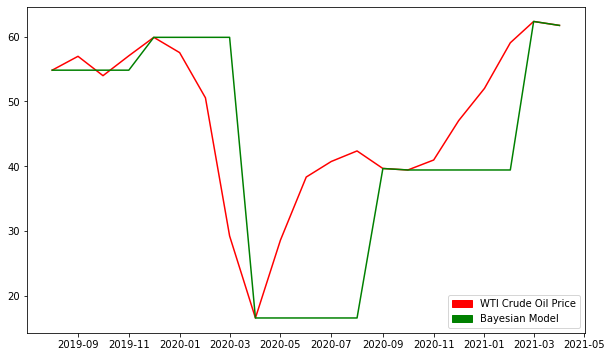

In [ ]:
test_price = pd.DataFrame(index = test_data['WTISPLC'][1:].index);
test_price['WTISPLC'] = test_data['WTISPLC'][1:]
dt = pd.to_datetime(test_price.index)
test_price.index = dt

test_signal = pd.DataFrame(test_prediction, columns=['forecast']);
test_signal.index = test_price.index

test_sheet = pd.concat([test_price, test_signal], axis=1, join='inner');

trades = [test_sheet['WTISPLC'].iloc[0]];

position = True; # True for Long, False for Short

for i in range(len(test_sheet)-1):
    if test_sheet['forecast'].iloc[i+1] == 0:
        trades.append(trades[-1]);
    elif test_sheet['forecast'].iloc[i+1] == 2:
        if position == False:
            position = True;
            trades.append(trades[-1]);
        else:
            trades.append(test_sheet['WTISPLC'].iloc[i+1]);
    else:
        if position == False: # If Short, price stay the same
            trades.append(trades[-1]);
        else: # If Long, price follows actual price
            trades.append(test_sheet['WTISPLC'].iloc[i+1]);

#eia_forecast = pd.read_csv("./data/eia_forecast.csv", index_col=0);
#eia_forecast.index = test_signal.index;

test_performance = pd.DataFrame(trades, index = test_signal.index,
                                                     columns=['performance']);
test_sheet = pd.concat([test_sheet, test_performance], axis=1, join='inner');
plt.figure(figsize=(10,6))
plt.plot(test_sheet['WTISPLC'], 'r');
plt.plot(test_sheet['performance'], 'g');
#plt.plot(eia_forecast['eia_forecast'], 'b');
r_patch = mpatches.Patch(color='red', label='WTI Crude Oil Price');
g_patch = mpatches.Patch(color='green', label='Bayesian Model');
#b_patch = mpatches.Patch(color='blue', label='EIA Forecast');
#plt.legend(handles=[r_patch, g_patch, b_patch], loc = 'lower right');
plt.legend(handles=[r_patch, g_patch], loc = 'lower right');

The above graph shows that a simple trading algorithm which sells, holds or buys given the respective signal of "0", "1" and "2" (as derived from the column of forecast values) tracks the actual WTI Crude Oil price closely after adjusting itself for a couple of months from Aug 2019 to Dec 2019.

## Step 6

Assessing the contributions. As a group, the team:

a. assesses the 8 proposed results (from Danish paper). For example, “First, it contributes to the original research of replacing EGARCH-M derived views with
Bayesian Model derived views for the Black-Litterman model...”;

b. cites the specific pages, graphs, and results from the paper for each proposed
result;

c. reflects critically on whether the author’s work accomplished what was proposed;

d. if the group feels the author achieved this contribution, the group then indicates
if/why they think this is important.

Note: Groups of 2 can focus on just five of these proposed results (from Danish paper).

## Step 7


Application. As a group, the team writes a non-technical version of the results as the “Discussion” section. In particular, the section should focus on what this study does better, more quickly, or more cost-effectively than existing prediction models.

This study and exercise has shown that the intersection of computational finance and machine learning methodologies, in particular, the probabilistic graphical model (PGM) or Bayesian networks to be specific, are able to help improve the development of more accurate and robust models for oil price forecasting. This is achieved by incorporating information from a wide range of sources, such as macroeconomic data from FRED and EIA database, microeconomic data from national bureau statistics and financial data from Yahoo Finance amongst many others.  Furthermore, Bayesian networks can be used to model the complex interactions of the above-mentioned factors affecting oil prices, such as the impact of political instability in oil-producing regions on global oil supply, without any expert intervention, enabling a diverse range of stakeholders from policy makers, risk managers to commodities traders to have a better understanding of the structure of the oil markets. In this way, PGMs can help identify patterns and trends that may not be apparent using traditional forecasting methods. Such forecasts are also backed by the current economic situation as evidence. To top it all, PGMs has proven its worth as a class of machine learning models that can be used in automated trading mechanisms where Bayesian inferencing can be used to update the PGM in particular the probability of a hypothesis as new evidence becomes available. Thus, alpha seeking algorithms based on PGMs can achieve success through fundamental analysis, technical analysis, a combination of both in quantitative analysis and arbitrage opportunities.

In comparison, existing models for forecasting crude oil prices assume prices and their error terms or residuals are linear functions of previous prices and error terms. Belief Networks are able to capture a wide variety of factors including macroeconomic, microeconomic, and geopolitical events that have major influence in crude oil prices. Furthermore, the ability of the forecasting model to detect changes in the underlying structure of the market in terms of hidden states or regimes of markets such as periods of low or high volatility gives it an edge over existing time-series data only forecasting models. The result is that this graphical model can capture complex patterns and dependencies in the data that are not explicitly observed.

In summary, the confluence of hidden states or regimes of market capture, conditional dependence of market factors modeling and network structure learning algorithms makes the model produced in this paper better in crude oil price forecasting than existing forecasting methods although more research still needs to be done to confirm its performance consistency.

# References

1. Kosakowski, P. (2022) What determines oil prices?, Investopedia. Investopedia. Available at: https://www.investopedia.com/articles/economics/08/determining-oil-prices.asp (Accessed: January 17, 2023).

1. Koller & Friedman (2009) "Probabilistic graphical models: principles and techniques" MIT Press.

1. Cooper, G. F., & Herskovits, E. (1992). "A Bayesian method for the induction of probabilistic networks from data"

1. Wainwright, M. J., & Jordan, M. I. (2008) "Graphical models, exponential families, and variational inference"

1. Koller, D., & Pfeffer (1997) "Object-oriented Bayesian networks. Artificial Intelligence"

1. Jana, Abhisek, et al. “Forward and Backward Algorithm in Hidden Markov Model.” A Developer Diary, 1 June 2020, https://www.adeveloperdiary.com/data-science/machine-learning/forward-and-backward-algorithm-in-hidden-markov-model/.

1. Jana, Abhisek, et al. “Implement Viterbi Algorithm in Hidden Markov Model Using Python and R.” A Developer Diary, 22 Feb. 2019, http://www.adeveloperdiary.com/data-science/machine-learning/implement-viterbi-algorithm-in-hidden-markov-model-using-python-and-r/.

1. 10. Learning Bayesian Networks from Data.” - Pgmpy 0.1.19 Documentation, https://pgmpy.org/detailed_notebooks/10.%20Learning%20Bayesian%20Networks%20from%20Data.html?highlight=bayesian%2Bmodel.



---